# <center>DBSCAN聚类算法</center>

<center>**<font size = 5>Author : TianSong</font>**</center>
<br/>
<center>**<font size = 5>Date : 20180914</font>**</center>

**Density-based spatial clustering of applications with noise (DBSCAN)** is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996. It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.

## 一、DBSCAN的重要定义

1. $ϵ$邻域：给定对象半径ϵ内的区域称为该对象的$ϵ$邻域。 
2. 核心对象（core points）：如果给定对象$ϵ$邻域内的样本点数大于等于$MinPts$，则称该对象为核心对象。 
3. 直接密度可达（directly density-reachable）：给定一个对象集合$D$，如果$p$在$q$的$ϵ$的邻域内，且$q$是一个核心对象，则我们说对象$p$从对象$q$出发是直接密度可达的。 
4. 密度可达（density-reachable）：对于样本集合$D$，如果存在一个对象链$P1,P2,...,Pn$,$P1=q$,$Pn=p$，对于$Pi∈D,1≤i≤n$，$Pi+1$是从$Pi$关于$ϵ$和$MinPts$直接密度可达，则对象$p$是从对象$q$关于$ϵ$和MinPts密度可达的。 
5. 密度相连（density-connected）：如果存在对象$o∈D$，使对象$p$和$q$都是从$o$关于$ϵ$和MinPts密度可达的，那么对象$p$到$q$是关于$ϵ$和$MinPts$密度相连的。

![](https://img-blog.csdn.net/20161127145725019)

## 二、DBSCAN的核心思想

DBSCAN算法的思想：若$\vec{x}$为核心对象，则$\vec{x}$密度可达的所有样本组成的集合{$\vec{x}^*\in D|\vec{x}$~>$\vec{x}^*$},可以证明X就是满足连接性与最大性的簇。于是DBSCAN算法首选任选数据集中的一个核心对象作为种子seed，再由此出发确定相应的聚类簇。

下面给出DBSCAN算法：

输入

数据集$\vec{x}_1,\vec{x}_2,\vec{x}_3,...,\vec{x}_N$
邻域参数（$ϵ$，$MinPts$）
输出：簇划分$C_1,C_2,...,C_k$

算法步骤如下： 
初始化核心对象集合为空集：$Ω=∅$
寻找核心对象：遍历所有的样本点$\vec{x}_i,i=1,2,...,N$，计算$N_\epsilon(\vec{x}_i)$，如果$N_\epsilon(\vec{x}_i)$ $\geq MinPts$，则Ω=Ω⋃{$\vec{x}$}
迭代：以任一未访问过的核心对象为出发点，找出有其密度可达的样本生成的聚类簇，直到所有的核心对象都被访问为止

## 三、聚类有效性指标

聚类有效性指标（Cluster Validity Index，CVI）用于度量聚类的效果。很显然，希望彼此相似的样本在一个簇，彼此不相似的样本尽量在不同的簇。也就是说：同一簇的样本彼此之间相似，不同簇之间的样本尽可能不同。

聚类的性能指标分为两类：

外部指标：该指标由聚类结果和某个参考模型进行比较而获得；
<br/>内部指标：该指标由本身的聚类结果而得到，不利用任何参考模型；


**外部指标：**
<br/>**Jaccard系数（Jaccard Cofficient，JC）:**
<br/>它刻画了所有属于同一类的样本对（要么在C中属于同一类，要么在C∗中属于同一类），同时在C,C∗中属于同一类的样本量的比值。

**FM指数（Fowlkes and Mallows Index，FMI）:**
<br/>它刻画的是：在C中属于同一类的样本对中，同时属于C∗的样本对的比例为p1，在C∗中属于同一类的样本对中，同时属于C的样本对的比例为p2，FMI就是p1和p2的几何平均。

**Rand指数（Rand Index，RI）：**
<br/>它刻画的是同时隶属C,C∗的样本对与同时不隶属于C,C∗的样本对之和占所有样本对的比例。

**ARI指数（Adjusted Rand Index，ARI）:**
<br/>使用RI时有个问题，就是对于随机聚类，RI不保证接近0（可能还很大）。而ARI指数就可以利用随机聚类情况下的RI即E[RI]来解决这个问题.
这些外部指标性能度量的结果都在[0,1]之间，这些值越大，说明聚类的性能越好。

**内部指标**
<br/>**DB指数（Davies-Bouldin Index ，DBI）:**
<br/>它刻画的是：给定两个簇，每个簇样本之间平均值之和比上两个簇的中心点之间的距离作为度量。然后考察该度量对所有簇的平均值。显然DBI越小越好。如果每个簇样本之间的平均值越小（即簇内样本距离都很近），则DBI越小；如果簇间中心点的距离越大（即簇样本距离互相都很远），则DBI越小。

**Dunn指数（Dunn Index，DI）:**
<br/>它刻画的是任意两个簇之间最近的距离的最小值，除以任意一个簇内距离最远的两个点的距离的最大值。显然DI越大越好。如果任意两个簇之间最近的距离的最小值越大（即簇间样本距离相互都很远），则DI越大；如果任意一个簇内距离最远的两个点的距离的最大值越小（即簇内样本距离都很近），则DI越大。

## 四、DBSCAN的Python代码

In [1]:
#  encoding=utf-8

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
class DBScan (object):
    """
    the class inherits from object, encapsulate the  DBscan algorithm
    """
    def __init__(self, p, l_stauts):

        self.point = p
        self.labels_stats = l_stauts
        self.db = DBSCAN(eps=0.2, min_samples=10).fit(self.point)

    def draw(self):

        coreSamplesMask = np.zeros_like(self.db.labels_, dtype=bool)
        coreSamplesMask[self.db.core_sample_indices_] = True
        labels = self.db.labels_
        nclusters = jiangzao(labels)

        # 输出模型评估参数，包括估计的集群数量、均匀度、完整性、V度量、
        # 调整后的兰德指数、调整后的互信息量、轮廓系数
        print('Estimated number of clusters: %d' % nclusters)
        print("Homogeneity: %0.3f" % metrics.homogeneity_score(self.labels_stats, labels))
        print("Completeness: %0.3f" % metrics.completeness_score(self.labels_stats, labels))
        print("V-measure: %0.3f" % metrics.v_measure_score(self.labels_stats, labels))
        print("Adjusted Rand Index: %0.3f"
              % metrics.adjusted_rand_score(self.labels_stats, labels))
        print("Adjusted Mutual Information: %0.3f"
              % metrics.adjusted_mutual_info_score(self.labels_stats, labels))
        print("Silhouette Coefficient: %0.3f"
              % metrics.silhouette_score(self.point, labels))

        # 绘制结果
        # 黑色被移除，并被标记为噪音。
        unique_labels = set(labels)
        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # 黑色用于噪声
                col = 'k'

            classMemberMask = (labels == k)

            # 画出分类点集
            xy = self.point[classMemberMask & coreSamplesMask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=6)

            # 画出噪声点集
            xy = self.point[classMemberMask & ~coreSamplesMask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=3)
        # 加标题，显示分类数
        plt.title('Estimated number of clusters: %d' % nclusters)
        plt.show()

Estimated number of clusters: 4
Homogeneity: 0.928
Completeness: 0.862
V-measure: 0.894
Adjusted Rand Index: 0.928
Adjusted Mutual Information: 0.862
Silhouette Coefficient: 0.584


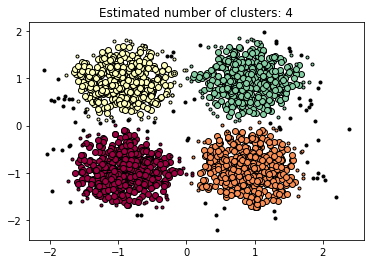

In [3]:
def jiangzao (labels):

    # 标签中的簇数，忽略噪声（如果存在）
    clusters = len(set(labels)) - (1 if -1 in labels else 0)
    return clusters

def standar_scaler(points):

    p = StandardScaler().fit_transform(points)
    return p

if __name__ == "__main__":
     """
     test class dbScan
     """
     centers = [[1, 1], [-1, -1], [-1, 1], [1, -1]]
     point, labelsTrue = make_blobs(n_samples=2000, centers=centers, cluster_std=0.4,
                                    random_state=0)
     point = standar_scaler(point)
     db = DBScan(point, labelsTrue)
     db.draw()

## 五、DBSCAN小结

　　和传统的K-Means算法相比，DBSCAN最大的不同就是不需要输入类别数k，当然它最大的优势是可以发现任意形状的聚类簇，而不是像K-Means，一般仅仅使用于凸的样本集聚类。同时它在聚类的同时还可以找出异常点，这点和BIRCH算法类似。

　　那么我们什么时候需要用DBSCAN来聚类呢？一般来说，如果数据集是稠密的，并且数据集不是凸的，那么用DBSCAN会比K-Means聚类效果好很多。如果数据集不是稠密的，则不推荐用DBSCAN来聚类。

　　　　下面对DBSCAN算法的优缺点做一个总结。

　　　　DBSCAN的主要优点有：

　　　　1） 可以对任意形状的稠密数据集进行聚类，相对的，K-Means之类的聚类算法一般只适用于凸数据集。

　　　　2） 可以在聚类的同时发现异常点，对数据集中的异常点不敏感。

　　　　3） 聚类结果没有偏倚，相对的，K-Means之类的聚类算法初始值对聚类结果有很大影响。

　　　　DBSCAN的主要缺点有：

　　　　1）如果样本集的密度不均匀、聚类间距差相差很大时，聚类质量较差，这时用DBSCAN聚类一般不适合。

　　　　2） 如果样本集较大时，聚类收敛时间较长，此时可以对搜索最近邻时建立的KD树或者球树进行规模限制来改进。

　　　　3） 调参相对于传统的K-Means之类的聚类算法稍复杂，主要需要对距离阈值$ϵ$，邻域样本数阈值MinPts联合调参，不同的参数组合对最后的聚类效果有较大影响。